In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())
from tslb.src.lzw import *
from tslb.src.utils import *
from tslb.src.regModel import regModel as regModel

plt.rcParams.update({'font.size': 14})

In [ ]:
df = pd.raead_csv("../data/CausalityProjectSnapshot/labelsFall2013.csv")

In [23]:
data = df[['user_id','timestamp','Happiness_Morning','Happiness_Evening']]
data = df[['user_id','timestamp']]

In [10]:
data

,user_id,timestamp,Happiness_Morning,Happiness_Evening
0,CS13M001,2013-10-28 00:00:00,96.0,83.0
1,CS13M001,2013-10-29 00:00:00,79.0,74.0
2,CS13M001,2013-10-30 00:00:00,71.0,92.0
3,CS13M001,2013-10-31 00:00:00,48.0,72.0
4,CS13M001,2013-11-01 00:00:00,50.0,72.0
...,...,...,...,...
595,CS13M005,2013-11-22 00:00:00,NaN,48.0
596,CS13M009,2013-11-09 00:00:00,NaN,93.0
597,CS13M012,2013-11-22 00:00:00,NaN,50.0
598,CS13M013,2013-11-03 00:00:00,NaN,56.0


In [39]:
x = lambda a: {"ME": 'morning', "value": df["Happiness_Morning"][a]}
y = lambda a: {"ME": 'evening', "value": df["Happiness_Evening"][a]}

In [83]:
data_new = pd.DataFrame()
for i in range(600):
    ser1 = data.iloc[i].append(pd.Series(x(i)))
    ser2 = data.iloc[i].append(pd.Series(y(i)))
    oneday = pd.DataFrame([ser1, ser2])
    data_new = pd.concat([data_new,oneday], axis=0)
data_new = data_new.reset_index(drop=True)

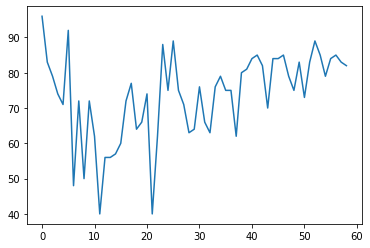

In [84]:
plt.plot(data_new[data_new.user_id == 'CS13M001'].value)

In [92]:
(data_new.value)

0       96.0
1       83.0
2       79.0
3       74.0
4       71.0
        ... 
1195    50.0
1196     NaN
1197    56.0
1198     NaN
1199    73.0
Name: value, Length: 1200, dtype: float64

In [96]:
print("abc" == 'abc')

True


In [107]:
x = '    asdf asdf asdfdsa fwe fsd'
x = x.strip()

In [109]:
x.upper()

'ASDF ASDF ASDFDSA FWE FSD'

In [115]:
x = {1,2,3}

In [117]:
x.add(4)

In [118]:
x

{1, 2, 3, 4}

In [119]:
x.add(1)

In [122]:
print(x)

{1, 2, 3, 4}


In [126]:
for x in range(5):
    sys.stdout.write(str(x))


01234

In [74]:
# This function takes last element as pivot, places 
# the pivot element at its correct position in sorted 
# array, and places all smaller (smaller than pivot) 
# to left of pivot and all greater elements to right 
# of pivot
def partition(arr, start, end): 
    pivot = arr[end]
    i = start
    for j in range(start, end): 
        if (arr[j] <= pivot):
            arr[i],arr[j] = arr[j],arr[i] 
            i += 1
            print(arr)
            print(i)
    arr[i], arr[end] = arr[end], arr[i]
    return i

def sort(arr,start,end):
    while (start < end):
        ind = partition(arr,start,end)
        print(ind)
        print(arr)
        sort(arr, start, ind-1) 
        sort(arr, ind+1, end) 


In [75]:
# Driver code to test above 
arr = [7, 18, 11, 1, 6, 5, 10] 
n=len(arr)
sort(arr,0,n-1)

print ("Sorted array is:") 
print(arr)

[7, 18, 11, 1, 6, 5, 10]
1
[7, 1, 11, 18, 6, 5, 10]
2
[7, 1, 6, 18, 11, 5, 10]
3
[7, 1, 6, 5, 11, 18, 10]
4
4
[7, 1, 6, 5, 10, 18, 11]
[1, 7, 6, 5, 10, 18, 11]
1
1
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]

3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]

[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1,

3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[

[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3

[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1, 5, 6, 7, 10, 18, 11]
3
3
[1, 5, 6, 7, 10, 18, 11]
[1,

KeyboardInterrupt: 